- looking at response biases, moviewise socialness
- visualize rt distributions
- plotting rt distributions across movies and per movie
- comparing RT distributions

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [59]:
# setting default fontsizes for plots

s=20 # CHANGE FONTSIZE HERE

plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend
#import matplotlib as mpl
#mpl.rcParams['font.weight']= 'normal'


In [3]:
# load data
final_data_folder = r'/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/RT_online_task'
dat_all = pd.read_csv(os.path.join(final_data_folder,'RT_data_all_subs.csv'))
dat_all.head()

,Unnamed: 0,sub_ind,respDur_keys,respDur_rt,respAfter_keys,respAfter_rt,movie,date,movie_ind,consistency
0,0,86.0,left,3.070585,left,0.868510,COAXINGB0,2021-07-25_08h39.36.916,0.0,1.0
1,1,86.0,right,1.909830,right,0.669700,BILLIARDA1,2021-07-25_08h39.36.916,1.0,1.0
2,2,86.0,right,2.362310,right,0.497975,DRIFTINGA2,2021-07-25_08h39.36.916,2.0,1.0
3,3,86.0,left,4.312300,left,1.568915,FISHING3,2021-07-25_08h39.36.916,3.0,1.0
4,4,86.0,right,1.539055,right,0.667690,RANDOMMECH4,2021-07-25_08h39.36.916,4.0,1.0


In [4]:
vid_names_hcp = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", "Random mechanical", "Scaring", "SEDUCING-B", "STAR-A", "SURPRISING-B", "TENNIS-A"]


## Preliminary checks - response bias etc.

(array([ 56.,   0.,   0.,   0.,   0.,  23.,   0.,  28.,   0., 887.]), array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]), <BarContainer object of 10 artists>)


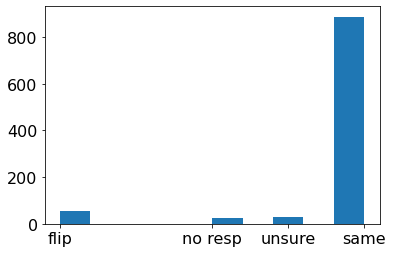

In [5]:
x = [-1,0,.5,1]
plt.xticks(x,['flip', 'no resp', 'unsure', 'same'])
y = plt.hist(dat_all['consistency'].values)

print(y) # -1(response flip):56 , 0(response missed):23, 0.5(response changed to unsure):28, 1(consistent):887

In [6]:
total = 56+23+28+887
total

994

In [7]:
print('% during-> after changed: \nflip:',100*56/1000, '%\nno resp:',100*23/1000, 
      '%\nchange to unsure:',100*28/1000, '%\nconsistent:',100*887/1000, '%')

% during-> after changed: 
flip: 5.6 %
no resp: 2.3 %
change to unsure: 2.8 %
consistent: 88.7 %


In [8]:
# left: social, right: random, down, unsure

In [9]:
# Response during : % of left and right responses in the "during" phase
l_resp_dur = len(np.where(dat_all['respDur_keys'].values == 'left')[0])
r_resp_dur = len(np.where(dat_all['respDur_keys'].values == 'right')[0])
print(f'left:{100*l_resp_dur/(l_resp_dur+r_resp_dur):.2f}%, right: {100*r_resp_dur/(l_resp_dur+r_resp_dur):.2f}%')
#dat_all.groupby(['respDur.keys']).count()

left:49.50%, right: 50.50%


In [10]:
# Response after: % of left, right and down responses in the "after" phase --> to compare with HCP data

l_resp_aft = len(np.where(dat_all['respAfter_keys'].values == 'left')[0])
r_resp_aft = len(np.where(dat_all['respAfter_keys'].values == 'right')[0])
d_resp_aft = len(np.where(dat_all['respAfter_keys'].values == 'down')[0])

print(f'left:{100*l_resp_aft/(l_resp_aft+r_resp_aft+d_resp_aft):.2f}%, right: {100*r_resp_aft/(l_resp_aft+r_resp_aft+d_resp_aft):.2f}%,\
     down: {100*d_resp_aft/(l_resp_aft+r_resp_aft+d_resp_aft):.2f}%')
#dat_all.groupby(['respDur.keys']).count()

left:52.83%, right: 44.28%,     down: 2.88%


In [11]:
movie_names = ['COAXINGB0','BILLIARDA1','DRIFTINGA2','FISHING3','RANDOMMECH4',
              'SCARING5', 'SEDUCINGB6', 'STARA7', 'SURPRISINGB8', 'TENNISA9']


In [12]:
dat_all.columns

Index(['Unnamed: 0', 'sub_ind', 'respDur_keys', 'respDur_rt', 'respAfter_keys',
       'respAfter_rt', 'movie', 'date', 'movie_ind', 'consistency'],
      dtype='object')

In [13]:
#red_rgb = [103,0,31] # edges of RdBu
#blue_rgb = [5,48,97] # edges of RdBu
red_rgb =[188,61,62] # from Emily
blue_rgb = [54,122,177] # from Emily
red_rgb = np.array(red_rgb)/255
blue_rgb = np.array(blue_rgb)/255
alpha = .2 # transparency inside boxplots, for datapts etc.

In [21]:
vid_names_short = np.array([str.upper(i[:4]) for i in vid_names_hcp])
vid_names_short

array(['COAX', 'BILL', 'DRIF', 'FISH', 'RAND', 'SCAR', 'SEDU', 'STAR',
       'SURP', 'TENN'], dtype='<U4')

In [38]:
hcp_socialness_sorted_names = ['SURP','COAX','SEDU','SCAR','FISH','RAND','TENN','STAR','BILL','DRIF']
hcp_socialness_sorted_ind = []
for i,m1 in enumerate(vid_names_short):
    for j,m2 in enumerate(hcp_socialness_sorted_names):
        if m1== m2:
            hcp_socialness_sorted_ind.append(j)
            break
print(hcp_socialness_sorted_ind)


[1, 8, 9, 4, 5, 3, 2, 7, 0, 6]


In [50]:
subsel_data_dur


respDur_rt       socialness_dur nonsocialness_dur  \
respDur_keys       left right                                    
movie_ind                                                        
8.0                  96     4      96.000000          4.000000   
0.0                  96     4      96.000000          4.000000   
6.0                  98     2      98.000000          2.000000   
5.0                  81    17      82.653061         17.346939   
3.0                  91     8      91.919192          8.080808   
4.0                  10    89      10.101010         89.898990   
9.0                   8    91       8.080808         91.919192   
7.0                   6    94       6.000000         94.000000   
1.0                   2    98       2.000000         98.000000   
2.0                   4    95       4.040404         95.959596   

             socialness_rank_hcp  
respDur_keys                      
movie_ind                         
8.0                            0  
0.0                            1  
6.0                            2  
5.0                            3  
3.0                            4  
4.0                            5  
9.0                            6  
7.0                            7  
1.0                            8  
2.0                            9

Text(0.5, 1.0, 'Response time (sec) during/after each movie')

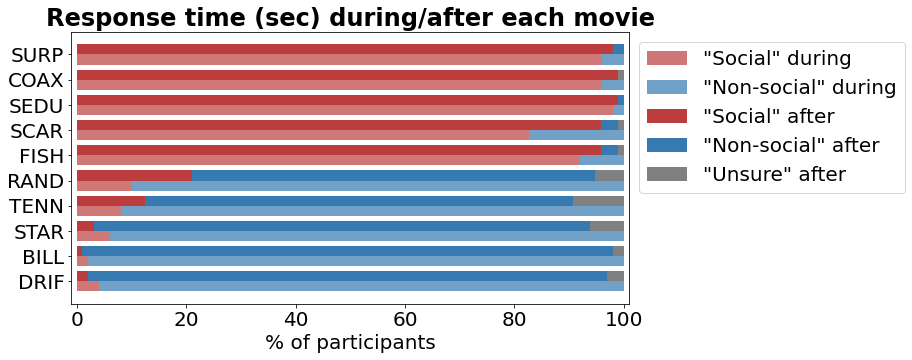

In [61]:
# plot mean socialness
#during
plt.figure(1,figsize=(10,5))
subsel_data_dur = dat_all.loc[:,['movie_ind','respDur_keys','respDur_rt']].groupby(['movie_ind','respDur_keys']).count()
subsel_data_dur = subsel_data_dur.unstack(level = -1)
subsel_data_dur = subsel_data_dur.fillna(0)
subsel_data_dur['socialness_dur'] = 100*subsel_data_dur['respDur_rt']['left']/(subsel_data_dur['respDur_rt']['left'] + 
                                                               subsel_data_dur['respDur_rt']['right'])
subsel_data_dur['nonsocialness_dur'] = 100*subsel_data_dur['respDur_rt']['right']/(subsel_data_dur['respDur_rt']['left'] + 
                                                               subsel_data_dur['respDur_rt']['right'])
subsel_data_dur['socialness_rank_hcp'] = hcp_socialness_sorted_ind
#subsel_data_dur = subsel_data_dur.sort_values(by='socialness_dur')
subsel_data_dur = subsel_data_dur.sort_values(by='socialness_rank_hcp',ascending=False)
plt.barh(range(10),subsel_data_dur['socialness_dur'].values,color = red_rgb, align='edge', height = -.4, label='"Social" during', alpha=.7)
plt.barh(range(10),subsel_data_dur['nonsocialness_dur'].values,left=subsel_data_dur['socialness_dur'].values,color = blue_rgb, align='edge', height = -.4, label='"Non-social" during', alpha=.7)
lbls = [str.upper(i[:4]) for i in movie_names]
#plt.xticks(subsel_data.index)
plt.yticks(np.arange(10),[str.upper(movie_names[int(i)][:4]) for i in subsel_data_dur.index], rotation = 0)
#plt.ylim(.7,1)

#after
subsel_data_aft = dat_all.loc[:,['movie_ind','respAfter_keys','respAfter_rt']].groupby(['movie_ind','respAfter_keys']).count()
subsel_data_aft = subsel_data_aft.unstack(level = -1)
subsel_data_aft = subsel_data_aft.fillna(0)
subsel_data_aft['socialness_aft'] = 100*subsel_data_aft['respAfter_rt']['left']/(subsel_data_aft['respAfter_rt']['left'] + 
                                                               subsel_data_aft['respAfter_rt']['right'] + subsel_data_aft['respAfter_rt']['down'])
subsel_data_aft['nonsocialness_aft'] = 100*subsel_data_aft['respAfter_rt']['right']/(subsel_data_aft['respAfter_rt']['left'] + 
                                                               subsel_data_aft['respAfter_rt']['right'] + subsel_data_aft['respAfter_rt']['down'])
subsel_data_aft['unsure_aft'] = 100*subsel_data_aft['respAfter_rt']['down']/(subsel_data_aft['respAfter_rt']['left'] + 
                                                               subsel_data_aft['respAfter_rt']['right'] + subsel_data_aft['respAfter_rt']['down'])                                                            
#subsel_data_aft['socialness_dur'] = subsel_data_dur['socialness_dur']
#subsel_data_aft = subsel_data_aft.sort_values(by='socialness_dur')

subsel_data_aft['socialness_rank_hcp'] = hcp_socialness_sorted_ind
subsel_data_aft = subsel_data_aft.sort_values(by='socialness_rank_hcp',ascending=False)

plt.barh(range(10),subsel_data_aft['socialness_aft'].values,color= red_rgb, align='edge', height = .4, label='"Social" after')
plt.barh(range(10),subsel_data_aft['nonsocialness_aft'].values,left=subsel_data_aft['socialness_aft'].values,color = blue_rgb, align='edge', height = .4, label='"Non-social" after')
plt.barh(range(10),subsel_data_aft['unsure_aft'].values,left=(subsel_data_aft['socialness_aft'].values+subsel_data_aft['nonsocialness_aft'].values),color = 'grey', align='edge', height = .4, label='"Unsure" after')
lbls = [str.upper(i[:4]) for i in movie_names]
#plt.xticks(subsel_data.index)
plt.xlim(-1,101)
#plt.title('Socialness per movie after', fontweight = 'bold')
plt.legend(bbox_to_anchor=[1,1],fontsize=20)
plt.xlabel('% of participants',fontsize=20)
plt.title('Response time (sec) during/after each movie', fontweight = 'bold',fontsize=24)



Text(0.5, 1.0, 'Unanimity in the sample during')

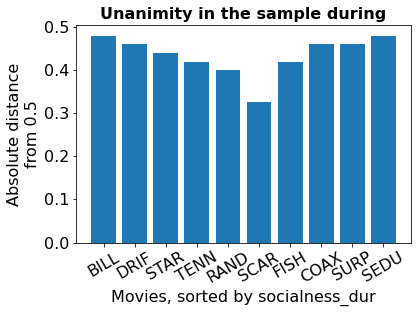

In [15]:
# plot certainty/unanimity in perception
subsel_data_dur['unanimity'] = np.abs(0.5-subsel_data_dur['socialness_dur']/100)
plt.bar(range(10),subsel_data_dur['unanimity'].values)
lbls = [str.upper(i[:4]) for i in movie_names]
plt.xticks(np.arange(10),[str.upper(movie_names[int(i)][:4]) for i in subsel_data_dur.index], rotation = 30)
#plt.ylim(.7,1)
plt.xlabel('')
plt.ylabel('Absolute distance\nfrom 0.5')
plt.xlabel('Movies, sorted by socialness_dur')
plt.title('Unanimity in the sample during', fontweight = 'bold')



- above: Another way of presenting earlier data: most ambiguous movies are halfway between extreme social or nonsocial.

In [16]:
mat = dat_all.groupby(['movie_ind','consistency']).count().unstack(level=-1)
print(mat)
mat['respDur_keys'][1.0].values # consistent

            Unnamed: 0                 sub_ind                 respDur_keys  \
consistency       -1.0  0.0  0.5   1.0    -1.0  0.0  0.5   1.0         -1.0   
movie_ind                                                                     
0.0                3.0  3.0  1.0  93.0     3.0  3.0  1.0  93.0          3.0   
1.0                1.0  3.0  2.0  94.0     1.0  3.0  2.0  94.0          1.0   
2.0                2.0  NaN  3.0  94.0     2.0  NaN  3.0  94.0          2.0   
3.0                7.0  2.0  1.0  89.0     7.0  2.0  1.0  89.0          7.0   
4.0               13.0  4.0  5.0  77.0    13.0  4.0  5.0  77.0         13.0   
5.0               17.0  2.0  1.0  78.0    17.0  2.0  1.0  78.0         17.0   
6.0                1.0  NaN  NaN  99.0     1.0  NaN  NaN  99.0          1.0   
7.0                2.0  3.0  6.0  89.0     2.0  3.0  6.0  89.0          2.0   
8.0                3.0  3.0  NaN  94.0     3.0  3.0  NaN  94.0          3.0   
9.0                7.0  3.0  9.0  80.0     7.0  3.0 

array([93., 94., 94., 89., 77., 78., 99., 89., 94., 80.])

In [17]:
moviewise_cons = mat['respDur_keys'][1.0].values # consistent
total_subs_per_movie = np.nansum(mat['respDur_keys'].values, axis =1) #both consistent and inconsistent
total_subs_per_movie


array([100., 100.,  99.,  99.,  99.,  98., 100., 100., 100.,  99.])

Consistency, i.e., fraction of trials with "during = after":  89.2354124748491


Text(0.5, 1.0, 'During-After response consistency')

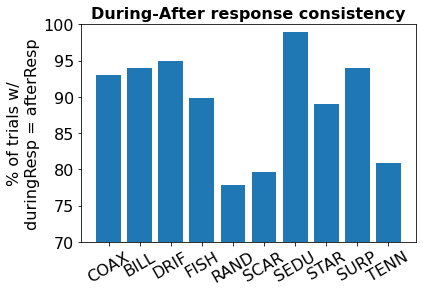

In [18]:
# consistency: fraction of trials where response during = response after
ncons = len(np.where(dat_all['consistency'] == 1)[0])
pc_consistency_all = 100*ncons/dat_all.shape[0]
print('Consistency, i.e., fraction of trials with "during = after": ', pc_consistency_all)


mat = dat_all.groupby(['movie_ind','consistency']).count().unstack(level=-1)
moviewise_cons = mat['respDur_keys'][1.0].values
total_subs_per_movie = np.nansum(mat['respDur_keys'].values, axis =1)
plt.bar(range(10),100*np.divide(moviewise_cons,total_subs_per_movie))
lbls = [str.upper(i[:4]) for i in movie_names]
plt.xticks(np.arange(10),lbls, rotation = 30)
plt.ylim(70,100)
plt.xlabel('')
plt.ylabel('% of trials w/\nduringResp = afterResp')
plt.title('During-After response consistency', fontweight = 'bold')



- Looks like some of our generally ambiguous movies (random mech, tennis etc.) also show less during-after consistency - suggesting evidence accumulation even after an early decision making during.

In [19]:
#before removing inconsistent responses, coaxing (CHECKING)
dat_all.loc[dat_all['movie_ind']==0,:].groupby(['respDur_keys','consistency']).count()

Unnamed: 0  sub_ind  respDur_rt  respAfter_keys  \
respDur_keys consistency                                                    
left          0.0                  2        2           2               0   
              0.5                  1        1           1               1   
              1.0                 93       93          93              93   
right        -1.0                  3        3           3               3   
              0.0                  1        1           1               0   

                          respAfter_rt  movie  date  movie_ind  
respDur_keys consistency                                        
left          0.0                    0      2     2          2  
              0.5                    1      1     1          1  
              1.0                   93     93    93         93  
right        -1.0                    3      3     3          3  
              0.0                    0      1     1          1

In [20]:
pop_response = ['left','right','left']
movie_inds = [0,1,6]
for i in range(3):
    print(dat_all.loc[(dat_all['movie']==movie_names[movie_inds[i]])&(dat_all['respDur_keys']==pop_response[i]),'respDur_rt'].mean(skipna=True))

4.405027812510416
4.395966071408163
5.2739460203979585


In [21]:
# remove trials with different during-after responses 
# note: during != after can also be due to a missed or unsure response, not just flipping opinion!!!
# best to not interpret inconsistent trials unless the flip is from Yes to No

dat_all= dat_all.loc[dat_all['consistency']==1,:]
dat_all.shape

(887, 10)

In [22]:
#after removing inconsistent responses. movie coaxing  (CHECKING)
dat_all.loc[dat_all['movie_ind']==0,:].groupby(['respDur_keys','consistency']).count() 
# no right-right responses for coaxing

,,Unnamed: 0,sub_ind,respDur_rt,respAfter_keys,respAfter_rt,movie,date,movie_ind
respDur_keys,consistency,,,,,,,,
left,1.0,93,93,93,93,93,93,93,93


In [23]:
pop_response = ['left','right','left']
movie_inds = [0,1,6]
for i in range(3):
    print(dat_all.loc[(dat_all['movie']==movie_names[movie_inds[i]])&(dat_all['respDur_keys']==pop_response[i]),'respDur_rt'].mean(skipna=True))

4.371888924741936
4.145837365569892
5.2739460203979585


In [24]:
thresh = 8
trial_counts = dat_all.groupby("sub_ind").count()["movie_ind"]
bad_subs = trial_counts[(trial_counts < thresh)].index
#print(bad_subs)
dat_all = dat_all.set_index('sub_ind') # make subj_idx the index
dat_all.drop(bad_subs, inplace=True) # remove bad subjects
dat_all = dat_all.reset_index() #bring back subj_idx as a column

print("Nr. of subjects left",len(dat_all.groupby("sub_ind")))
print("Nr. of rows:",dat_all.shape)

Nr. of subjects left 90
Nr. of rows: (821, 10)


In [25]:
# distribution of left and right responses for each movie
dat_all.groupby(['movie_ind','respDur_keys']).count().sub_ind.unstack(level = -1)

respDur_keys,left,right
movie_ind,,
0.0,86.0,NaN
1.0,1.0,87.0
2.0,NaN,89.0
3.0,80.0,2.0
4.0,6.0,66.0
5.0,72.0,1.0
6.0,89.0,NaN
7.0,2.0,82.0
8.0,83.0,1.0


## RT analyses

In [26]:
dat_all.shape

(821, 10)

In [27]:
# Visualising median RT during and after for each movie based on responses
print('\nMedian RT per movie (note:there were very few responses in the nondominant category):')
dat_all.groupby(['movie_ind','respDur_keys']).median().loc[:,['respDur_rt','respAfter_rt']]


Median RT per movie (note:there were very few responses in the nondominant category):


respDur_rt  respAfter_rt
movie_ind respDur_keys                          
0.0       left            3.450320      0.855000
1.0       left            9.541800      0.637700
          right           3.663600      0.700595
2.0       right           5.322500      0.720600
3.0       left            6.340550      0.881400
          right          14.475855      1.110347
4.0       left           13.872450      0.937950
          right           5.897500      0.864900
5.0       left           10.111350      0.779500
          right           8.264500      1.134300
6.0       left            5.008300      0.622500
7.0       left           13.901650      0.497950
          right           5.100900      0.634750
8.0       left            6.013300      0.756400
          right          10.807495      1.139515
9.0       left           12.933500      1.375800
          right           3.768800      0.819500

In [63]:
# Visualising median RT during and after for each movie based on responses
print('\nMedian RT per movie (note:there were very few responses in the nondominant category):')
dat_all.groupby(['movie_ind','respDur_keys']).sem().loc[:,['respDur_rt','respAfter_rt']]


Median RT per movie (note:there were very few responses in the nondominant category):


respDur_rt  respAfter_rt
movie_ind respDur_keys                          
0.0       left            0.248316      0.053104
          right           1.908425      0.300074
1.0       left            1.874300      0.045100
          right           0.263924      0.054393
2.0       left            0.425447      0.555435
          right           0.383892      0.056032
3.0       left            0.387884      0.051894
          right           1.682393      0.175711
4.0       left            1.495996      0.230890
          right           0.458823      0.056886
5.0       left            0.522265      0.044507
          right           0.758568      0.062443
6.0       left            0.255915      0.042641
          right           0.371250      0.237900
7.0       left            2.537832      0.269801
          right           0.286312      0.042745
8.0       left            0.292309      0.037513
          right           1.968728      0.185583
9.0       left            1.356928      0.167248
          right           0.329482      0.045715

In [28]:
pop_response = ['left','right','left']
movie_inds = [0,1,6]
for i in range(3):
    print(dat_all.loc[(dat_all['movie_ind']==movie_inds[i])&(dat_all['respDur_keys']==pop_response[i]),'respDur_rt'].median(skipna=True))

3.4503200005
3.6636
5.0083


In [29]:
# extracts RTs and stores them in a list - 1 index for RTs for a movie
rtDur_all = []
for movies in range(10):
    rows = dat_all['movie_ind'] == movies
    rtDur_all.append(dat_all.loc[rows,'respDur_rt'].values) # each list element is an array of during-RTs
print('len(rtDur_all):', len(rtDur_all),', rtDur_all[0].shape', rtDur_all[0].shape)

len(rtDur_all): 10 , rtDur_all[0].shape (86,)


#### Raincloud plots

In [30]:
red_rgb*1.2

array([0.88470588, 0.28705882, 0.29176471])

In [31]:
colors = [red_rgb,blue_rgb]
# Set your custom color palette
myPalette = sns.set_palette(sns.color_palette(colors))


In [32]:
#pip install ptitprince

import ptitprince as pt

In [33]:
import warnings
warnings.filterwarnings("ignore", message='single_var_warning.format("Vertical",x")')

### two ways of plotting

In [34]:
def box_plot(data, edge_color, fill_color,pos,v):
    # customize boxplots
    alpha= .2
    bp = ax.boxplot(data, positions = [pos], patch_artist=True,widths=.3,vert=v,flierprops = dict(markeredgecolor=edge_color,
    markerfacecolor=fill_color, alpha=alpha))
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'caps']:
        plt.setp(bp[element], color=edge_color)
    for element in ['medians']:
        plt.setp(bp[element], color='k',linewidth=2,ls='dashed')

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color,alpha=alpha)#'w'       
        
    return bp

In [42]:
dat_all.groupby(['movie','respDur_keys']).count().unstack(level=-1).sub_ind

respDur_keys,left,right
movie,,
BILLIARDA1,1.0,87.0
COAXINGB0,86.0,NaN
DRIFTINGA2,NaN,89.0
FISHING3,80.0,2.0
RANDOMMECH4,6.0,66.0
SCARING5,72.0,1.0
SEDUCINGB6,89.0,NaN
STARA7,2.0,82.0
SURPRISINGB8,83.0,1.0


/Users/f0053cz/anaconda3/envs/rainpy/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/f0053cz/anaconda3/envs/rainpy/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/f0053cz/anaconda3/envs/rainpy/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

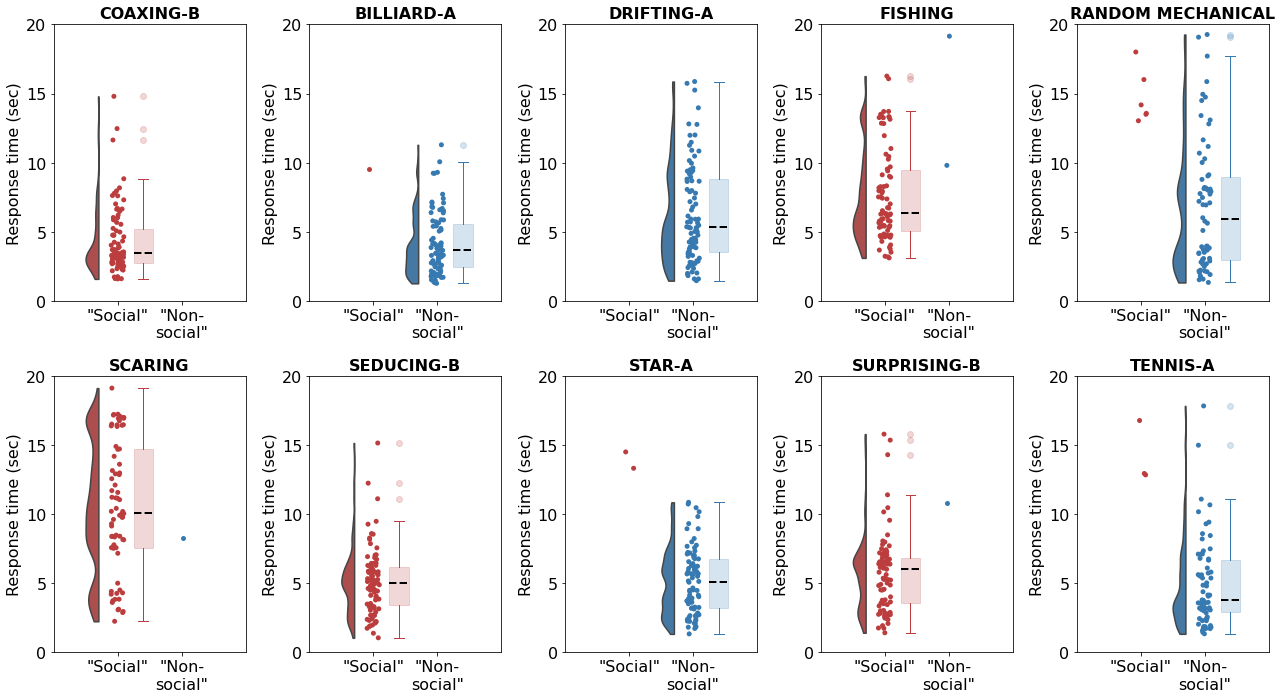

In [35]:
#same thing with a single command: now x **must** be the categorical value
m=0
df = dat_all.loc[dat_all['movie'] == movie_names[m],:]

dx = "respDur_keys"; dy = "respDur_rt"; ort = "v"; pal = myPalette; sigma = .2
f, ax = plt.subplots(figsize=(18, 10))
order = ['left','right']

boxplot_lims = [.4,1.4]
for m in range(10):
    plt.subplot(2,5,m+1)
    df = dat_all.loc[dat_all['movie']==movie_names[m],:]
    ax=pt.stripplot( y = dy, x = dx, data = df, palette = pal, edgecolor = "white",size = 3, jitter = True, zorder = 0, orient = ort,marker='.',s=10,order=order,move=0)
    plt.title(str.upper(vid_names_hcp[m]),fontweight='bold')
    #for i,resp in enumerate(['left','right']):
    for i,resp in enumerate(['left','right']):
        df2 = dat_all.loc[(dat_all['movie']==movie_names[m])&(dat_all['respDur_keys']==resp),:]
        keys_binary = [boxplot_lims[0] if i == 'left' else boxplot_lims[1] for i in df2['respDur_keys'].values]
        df2['keysDur_binary'] = keys_binary
        #df2['respDur_keys_binary'] = df2['respDur_keys'].map({'left': .5, 'right': 1.5})
        if df2.shape[0]>10:
            ax=pt.half_violinplot( y = dy, x = dx, data =df2, palette = pal, bw = .2, cut = 0.,
                                scale = "area", width = .4, inner = None, orient = ort,order=order,dodge=True,offset=.3)
            #ax=sns.boxplot( x = dx, y = dy, data = df2, color = "black", width = .1, zorder = 10,\
            #            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            #            showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
            #            saturation = 1, orient = ort,order=order,dodge=True)

            color =  red_rgb if df2['keysDur_binary'].values[0] == boxplot_lims[0] else blue_rgb
            bp = box_plot(df2[dy], color, color,df2['keysDur_binary'].values[0],True)

            #ax = plt.boxplot(, positions= [df2['keysDur_binary'].values[0]])
            

    plt.xlabel('')
    plt.xticks(range(2),['"Social"','"Non-\nsocial"'])
    plt.xlim(-1,2)
    plt.ylabel('Response time (sec)',)
    plt.ylim(0,20)
    plt.yticks([0,5,10,15,20])


plt.tight_layout()

4.291503139546512
4.108159482735632
5.113656292123596


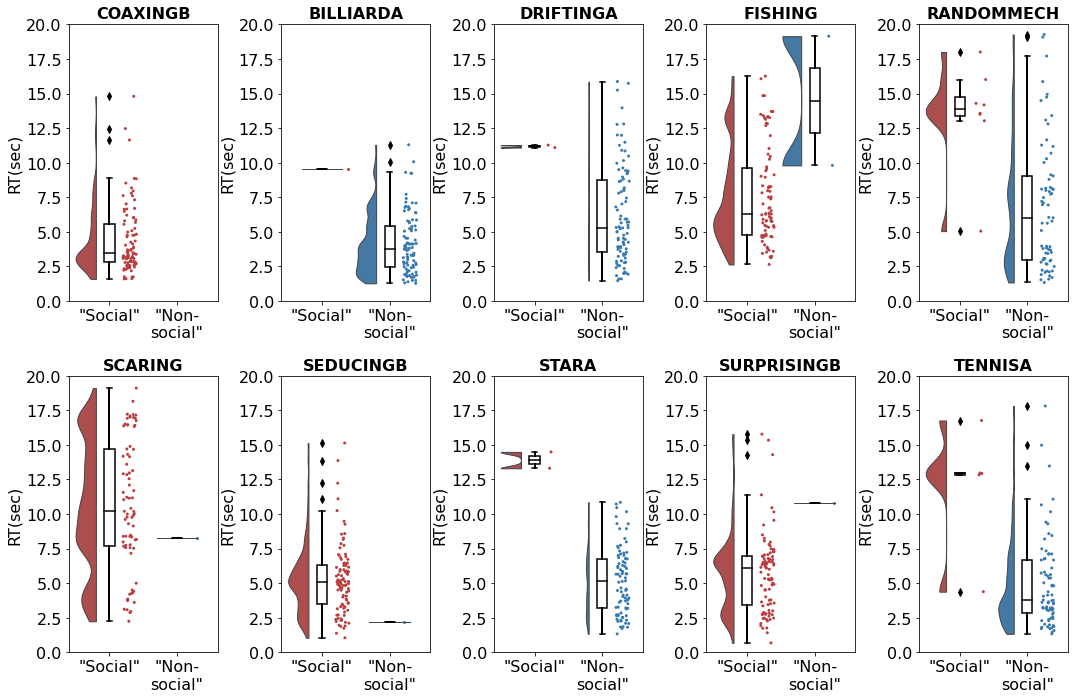

In [207]:
#same thing with a single command: now x **must** be the categorical value
#f, ax = plt.subplots(figsize=(7, 5))
plt.figure(1,figsize=(15,10))
m=6
for m in range(10):
    plt.subplot(2,5,m+1)
    df = dat_all.loc[(dat_all['movie'] == movie_names[m]),:]
    dx = df["respDur_keys"]; dy = df["respDur_rt"]; ort = "v"; pal = myPalette; sigma = .2
    #if m in [0,3,5,6,8]:
    #    pal = "RdBu"
    #else:
    #    pal = "RdBu_r"
    ax=plt.gcf().axes[m]
    pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,width_viol = .6, ax = ax, orient = ort,move = .3,order=['left','right'])
    #pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,\
    #                width_viol = .6, ax = plt.gcf().axes[m], orient = ort,move = .3)
    plt.xlabel('')
    #if m in [0,3,5,6,8]:
    plt.xticks(range(2),['"Social"','"Non-\nsocial"'])
    #else:
    #    plt.yticks(range(2),['"Non-\nsocial"','"Social"'])
    plt.ylabel('RT(sec)')
    plt.title(movie_names[m][:-1],fontweight='bold')
    
    plt.ylim(0,20)
    plt.xlim(-.6,1.6)
    
plt.tight_layout()

### other visualizations of RT

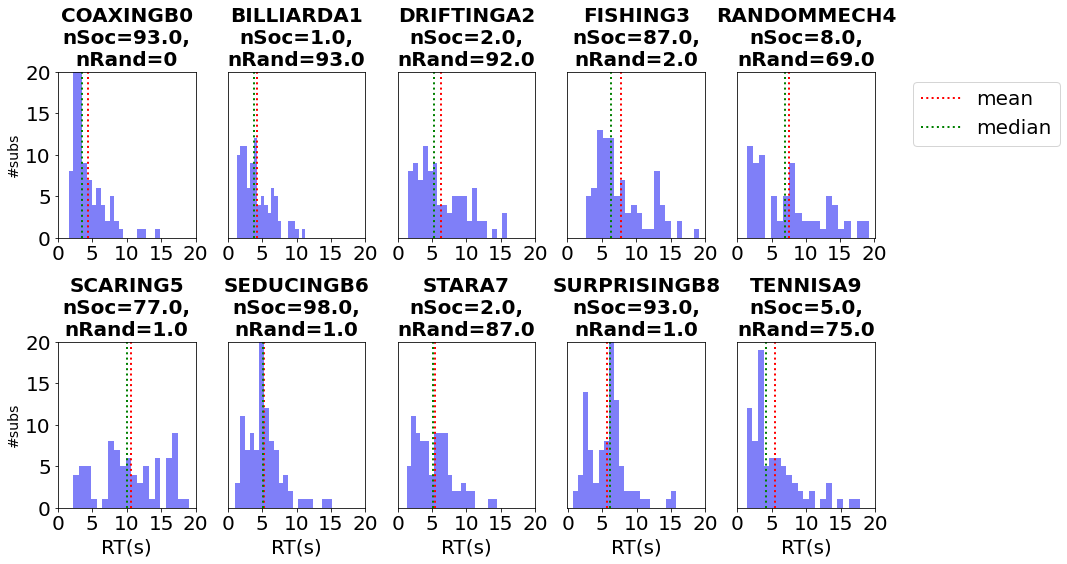

In [171]:
plt.figure(1,figsize = (15,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    val = rtDur_all[i]
    #plt.errorbar(i+1,np.nanmean(val),stats.sem(val, nan_policy = 'omit'),marker = 'o')
    #plt.plot(np.ones((len(val))),val, marker = 'o', ls = 'None')
    #sns.violinplot(val)
    s =  dat_all.groupby(['movie_ind','respDur_keys']).count().sub_ind.unstack(level = -1).iloc[i,0]
    ns =  dat_all.groupby(['movie_ind','respDur_keys']).count().sub_ind.unstack(level = -1).iloc[i,1]
    s = 0 if np.isnan(s) else s
    ns = 0 if np.isnan(ns) else ns
    plt.hist(val,bins=20, color = [0,0,.95],alpha = .5)
    #plt.title(movie_names[i] + ',n=' + str(nsubs[i])+ '\nnSoc='+ str(s) + ',nRand=' + str(ns))
    plt.title(movie_names[i] + '\nnSoc='+ str(s) + ',\nnRand=' + str(ns),fontweight = 'bold',fontsize =20)
    plt.vlines(np.mean(val),0,20,color = 'r', linewidth = 2, ls = 'dotted', label = 'mean')
    plt.vlines(np.median(val),0,20,color = 'g', linewidth = 2, ls = 'dotted', label = 'median')
    plt.xticks([0,5,10,15,20],fontsize =20)
    if i % 5 ==0:
        plt.yticks(fontsize =20)
        plt.ylabel('#subs')
    else:
        plt.yticks([])
    if i>4:
        plt.xlabel('RT(s)',fontsize =20)
    plt.ylim(0,20)
    if i ==4:
        plt.legend(bbox_to_anchor=(1.2, 1), loc = 'upper left',fontsize=20)
    
plt.tight_layout()
#lbls = [str.upper(i[:4]) for i in movie_names]
#plt.xticks(1+np.arange(10),lbls)

/Users/f0053cz/anaconda3/envs/rainpy/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


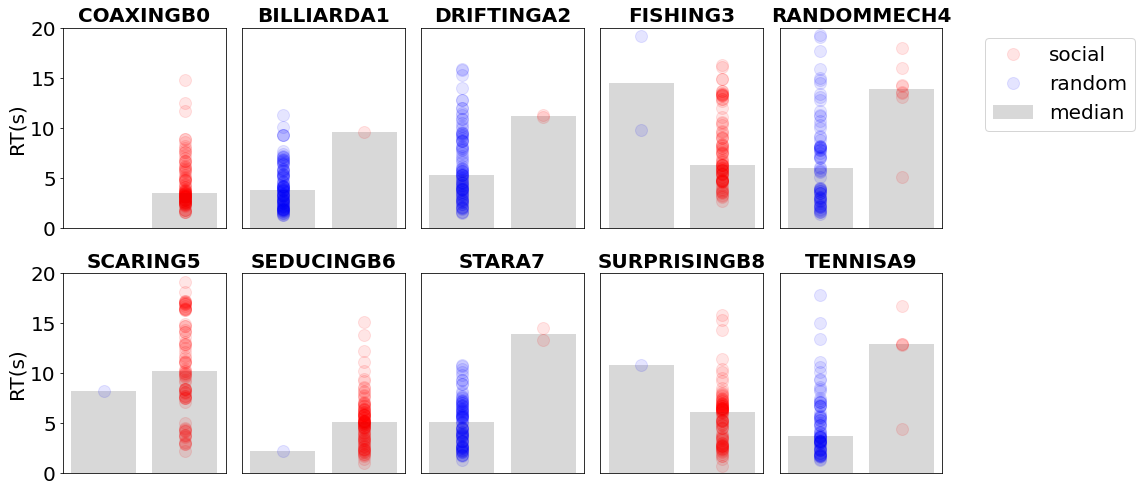

In [173]:
# visualizing RTs per group as dots
plt.figure(1,figsize =(16,7))
for i in range(10):
    plt.subplot(2,5,i+1)
    dat_movie = dat_all.loc[dat_all['movie_ind']==i]
        
    # extracts RTs and stores them in a list - 1 index for RTs for a movie
    rows = (dat_all['movie_ind'] == i) & (dat_all['respDur_keys'] == 'left') 
    val1 = dat_all.loc[rows,'respDur_rt'].values
    val1 = val1[~np.isnan(val1)]
    
    rows = (dat_all['movie_ind'] == i) & (dat_all['respDur_keys'] == 'right') 
    val2 = dat_all.loc[rows,'respDur_rt'].values
    val2 = val2[~np.isnan(val2)]
    
    plt.plot(np.ones((len(val1),))+.5,val1, color = 'red', ls = 'None',marker = 'o', markersize =12, alpha = .1, label = 'social')
    plt.plot(np.ones((len(val2),))-.5,val2, color = 'blue', ls = 'None',marker = 'o', markersize =12,alpha = .1, label = 'random')
    plt.bar([.5,1.5], [np.nanmedian(val2),np.nanmedian(val1)], color = 'grey', alpha = .3, label = 'median')
    #plt.hlines(0,0,2,color = 'k')
    if i ==4:
        plt.legend(bbox_to_anchor=(1.2, 1), loc = 'upper left',fontsize =20)
    plt.title(movie_names[i], fontweight = 'bold', fontsize =20)
    plt.xticks([])
    if i% 5 == 0:
        plt.yticks(fontsize=20)
        plt.ylabel('RT(s)',fontsize =20)
    else:
        plt.yticks([])
    plt.xlim(0,2)
    plt.ylim(0,20)
    plt.xlabel('')
    #lbls = [str.upper(i[:4]) for i in movie_names]
    #plt.xticks(np.arange(10),lbls, rotation = 30)
plt.tight_layout()

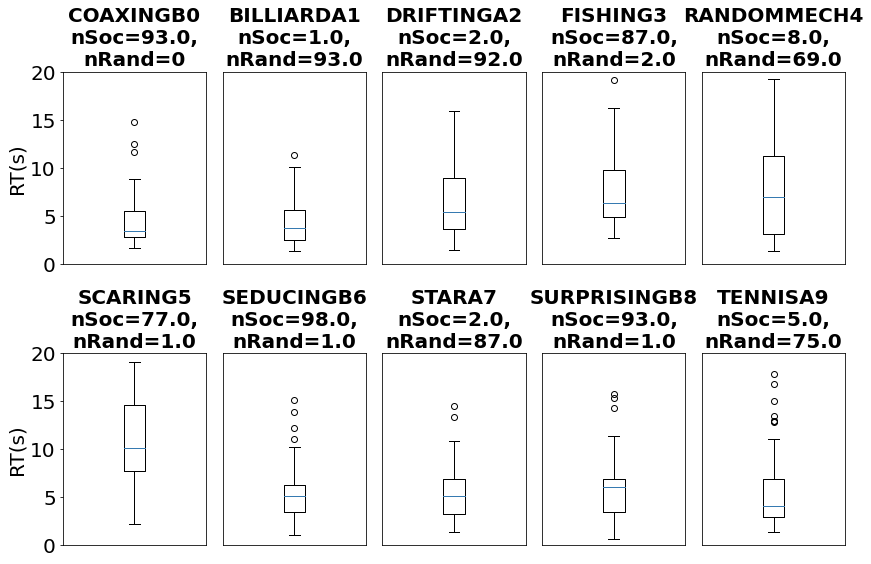

In [175]:
plt.figure(1,figsize = (12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    val = rtDur_all[i]
    #plt.errorbar(i+1,np.nanmean(val),stats.sem(val, nan_policy = 'omit'),marker = 'o')
    #plt.plot(np.ones((len(val))),val, marker = 'o', ls = 'None')
    #sns.violinplot(val)
    val = val[~np.isnan(val)]
    plt.boxplot(val, notch = False)
    s =  dat_all.groupby(['movie_ind','respDur_keys']).count().sub_ind.unstack(level = -1).iloc[i,0]
    ns =  dat_all.groupby(['movie_ind','respDur_keys']).count().sub_ind.unstack(level = -1).iloc[i,1]
    s = 0 if np.isnan(s) else s
    ns = 0 if np.isnan(ns) else ns
    plt.title(movie_names[i] + '\nnSoc='+ str(s) + ',\nnRand=' + str(ns),fontsize = 20,fontweight = 'bold')
    plt.xticks([])
    if i%5 ==0 :
        plt.yticks(fontsize =20)
        plt.ylabel('RT(s)', fontsize =20)
    else:
        plt.yticks([])
    plt.ylim(0,20)
plt.tight_layout()
#lbls = [str.upper(i[:4]) for i in movie_names]
#plt.xticks(1+np.arange(10),lbls)

## Comparing distrbutions

In [192]:
['_'+ mnames[0][:4],'_'+ mnames[1][:4],'_'+ mnames[2][:4]]

['_COAX', '_BILL', '_SEDU']

In [199]:
movie_inds = [0,1,6] # CHANGE MOVIE INDEX HERE.first should be social, second random
mnames = [movie_names[i] for i in movie_inds]
print(mnames)
df1 = dat_all.loc[(dat_all['movie']== mnames[0]) & (dat_all['respDur_keys']== 'left'),
                  ['sub_ind','respDur_rt']] # "social" responders for the social movie
df2 = dat_all.loc[(dat_all['movie']== mnames[1]) & (dat_all['respDur_keys']== 'right'), 
                  ['sub_ind','respDur_rt']] # "random" responders for the random movie
df3 = dat_all.loc[(dat_all['movie']== mnames[2]) & (dat_all['respDur_keys']== 'left'), 
                  ['sub_ind','respDur_rt']] # "random" responders for the random movie


ind = df2.sub_ind.isin(df1.sub_ind) & df1.sub_ind.isin(df2.sub_ind)
merged1 = pd.merge(df1, df2, how='inner', on=['sub_ind'],suffixes = ['_'+ mnames[0][:4],'_'+ mnames[1][:4]])
merged2 = pd.merge(df3, df2, how='inner', on=['sub_ind'],suffixes = ['_'+ mnames[2][:4],'_'+ mnames[1][:4]])

merged1['diff'] = merged1[merged1.columns[-2]] -  merged1[merged1.columns[-1]]
merged2['diff'] = merged2[merged2.columns[-2]] -  merged2[merged2.columns[-1]]

merged1 # list of subs who gave a "social" response for movie 1 and "nonsocial" response for movie 2



['COAXINGB0', 'BILLIARDA1', 'SEDUCINGB6']


,sub_ind,respDur_rt_COAX,respDur_rt_BILL,diff
0,86.0,3.070585,1.90983,1.160755
1,23.0,3.052000,1.77300,1.279000
2,39.0,3.072100,1.48970,1.582400
3,47.0,2.865100,2.78050,0.084600
4,31.0,3.453340,2.67928,0.774060
...,...,...,...,...
83,32.0,3.379000,3.69900,-0.320000
84,14.0,5.250400,5.72450,-0.474100
85,78.0,4.643200,4.06800,0.575200
86,9.0,8.183700,7.15560,1.028100


In [200]:
merged2

,sub_ind,respDur_rt_SEDU,respDur_rt_BILL,diff
0,86.0,2.112625,1.90983,0.202795
1,23.0,2.345000,1.77300,0.572000
2,39.0,2.420700,1.48970,0.931000
3,47.0,4.985000,2.78050,2.204500
4,31.0,1.913165,2.67928,-0.766115
...,...,...,...,...
86,32.0,5.330000,3.69900,1.631000
87,14.0,6.456500,5.72450,0.732000
88,78.0,7.860500,4.06800,3.792500
89,9.0,8.543400,7.15560,1.387800


In [201]:
# for the fmri analysis
print('median RT, social:', merged1['respDur_rt_COAX'].median())
print('median RT, random:', merged1['respDur_rt_BILL'].median())

median RT, social: 3.49295
median RT, random: 3.77125


In [202]:
# for the fmri analysis
print('median RT, social:', merged2['respDur_rt_SEDU'].median())
print('median RT, random:', merged2['respDur_rt_BILL'].median())

median RT, social: 5.0849
median RT, random: 3.749


NormaltestResult(statistic=24.38223069942927, pvalue=5.075348579828739e-06)


WilcoxonResult(statistic=1712.0, pvalue=0.30603819081541084)

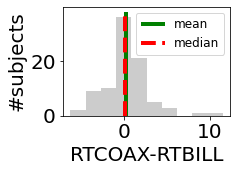

In [203]:
plt.figure(1,figsize =(3,2))
plt.hist(merged['diff'],bins =10,color ='grey', alpha = .4)
plt.xlabel ('RTCOAX-RTBILL', fontsize =20)
plt.ylabel('#subjects', fontsize =20)
ymi,yma = plt.ylim()
plt.vlines(np.mean(merged['diff']),ymi,yma,label = 'mean', ls = 'solid',color = 'g', linewidth = 4)
plt.vlines(np.median(merged['diff']),ymi,yma,label = 'median', ls = 'dashed', color = 'r', linewidth =4)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
print(stats.normaltest(merged['diff'])) # the difference is not normally distrbuted around zero.
stats.wilcoxon(merged['diff'])

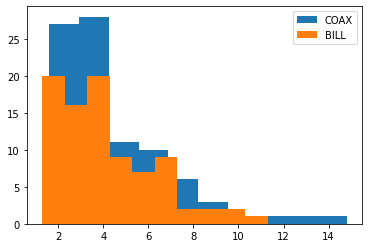

In [62]:
plt.hist(merged['respDur_rt_COAX'], label = 'COAX')
plt.hist(merged['respDur_rt_BILL'], label = 'BILL')
plt.legend()


In [68]:
movie_inds = [6,1] # CHANGE MOVIE INDEX HERE
mnames = [movie_names[i] for i in movie_inds]
print(mnames)
df1 = dat_all.loc[(dat_all['movie']== mnames[0]) & (dat_all['respDur_keys']== 'left'),
                  ['participant','respDur_rt']]
df2 = dat_all.loc[(dat_all['movie']== mnames[1]) & (dat_all['respDur_keys']== 'right'), 
                  ['participant','respDur_rt']]


ind = df2.participant.isin(df1.participant) & df1.participant.isin(df2.participant)
merged = pd.merge(df1, df2, how='inner', on=['participant'],suffixes = ['_'+ mnames[0][:4],'_'+ mnames[1][:4]])

merged['diff'] = merged[merged.columns[-2]] -  merged[merged.columns[-1]]

merged # list of subs who gave a "social" response for movie 1 and "nonsocial" response for movie 2


['SEDUCINGB6', 'BILLIARDA1']


,participant,respDur_rt_SEDU,respDur_rt_BILL,diff
0,60fd5d01137be0173165dcfe,2.112625,1.90983,0.202795
1,60fcd84f537cf56255168da7,2.345000,1.77300,0.572000
2,60fd22f7fd87f2c9d63a3639,2.420700,1.48970,0.931000
3,60fd2e10d0e4aa8935d07269,4.985000,2.78050,2.204500
4,60fd03302b29a3efada39165,1.913165,2.67928,-0.766115
...,...,...,...,...
86,60fd07c5ae9a10d5840b2eef,5.330000,3.69900,1.631000
87,60fca6fcaae0897c708e0390,6.456500,5.72450,0.732000
88,60fd58f89d037589c34f5a18,7.860500,4.06800,3.792500
89,60fc506aae18d45374e1e481,8.543400,7.15560,1.387800


NormaltestResult(statistic=5.633326554651264, pvalue=0.05980516339675759) mean diff: 1.0054784066043954


Ttest_1sampResult(statistic=4.047214495447447, pvalue=0.00010943915132574506)

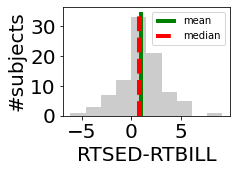

In [70]:
plt.figure(1,figsize =(3,2))
plt.hist(merged['diff'],bins =10,color = 'grey',alpha = .4)
plt.xlabel ('RTSED-RTBILL', fontsize =20)
plt.ylabel('#subjects', fontsize =20)
ymi,yma = plt.ylim()
plt.vlines(np.mean(merged['diff']),ymi,yma,label = 'mean', ls = 'solid',color = 'g', linewidth = 4)
plt.vlines(np.median(merged['diff']),ymi,yma,label = 'median', ls = 'dashed', color = 'r', linewidth =4)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
print(stats.normaltest(merged['diff']),'mean diff:',np.mean(merged['diff'])) # the difference is not normally distrbuted around zero.
stats.ttest_1samp(merged['diff'],0)

In [ ]:
plt.hist(merged['respDur_rt_SEDU'], label = 'SEDU')
plt.hist(merged['respDur_rt_BILL'], label = 'BILL')
plt.legend()



## Extra code

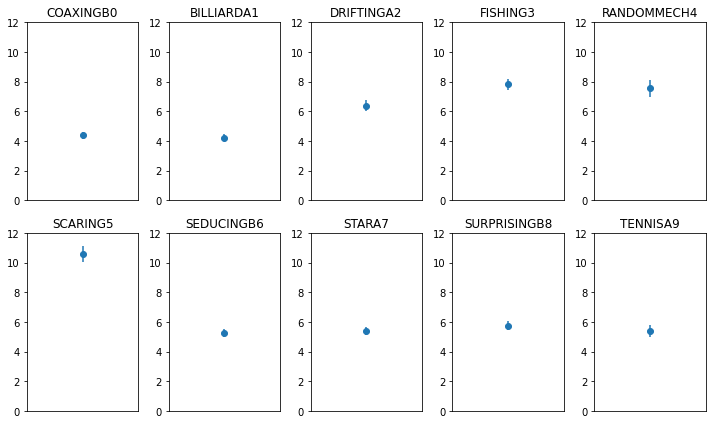

In [99]:
plt.figure(1,figsize = (10,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    val = rtDur_all[i]
    plt.errorbar(i+1,np.nanmean(val),stats.sem(val, nan_policy = 'omit'),marker = 'o')
    plt.title(movie_names[i])
    plt.xticks([])
    plt.ylim(0,12)
plt.tight_layout()
#lbls = [str.upper(i[:4]) for i in movie_names]
#plt.xticks(1+np.arange(10),lbls)

In [60]:
# check if this is correct
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m = np.mean(a)
    se = stats.sem(a)
    h = se * stats.t._ppf((1+confidence)/2., n-1)
    return m,h 

In [134]:
from scipy.stats import t

t_bounds = t.interval(0.999, len(val) - 1)
t_bounds

(-3.417985096707854, 3.4179850967078886)

<ipython-input-228-8934cd2f9f84>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-228-8934cd2f9f84>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


KstestResult(statistic=0.15053763440860216, pvalue=0.24350006240630304)

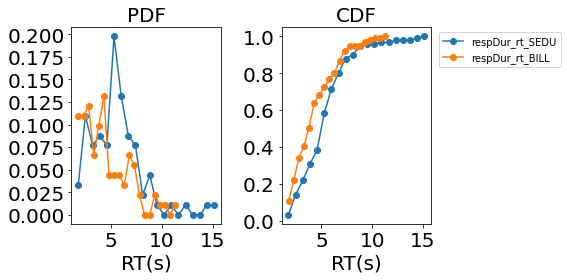

In [228]:
def cum_plot(data1,data2,lbls = ['data1','data2']):
    
    
    for i,data in enumerate([data1,data2]):
        # getting data of the histogram
        count, bins_count = np.histogram(data, bins=20)

        # finding the PDF of the histogram using count values
        pdf = count / sum(count)

        # using numpy np.cumsum to calculate the CDF
        # We can also find using the PDF values by looping and adding
        cdf = np.cumsum(pdf)

        # plotting PDF and CDF
        plt.figure(1,figsize =(8,4))
        plt.subplot(1,2,1)
        plt.title('PDF',fontsize =20)
        plt.plot(bins_count[1:], pdf,label=lbls[i],marker ='o')
        plt.xlabel('RT(s)',fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        #plt.legend()
        
        plt.subplot(1,2,2)
        plt.title('CDF',fontsize =20)
        plt.plot(bins_count[1:], cdf, label=lbls[i],marker ='o')
        plt.legend(bbox_to_anchor=(1.02,1))
        plt.xlabel('RT(s)',fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
    plt.tight_layout()

cum_plot(merged[merged.columns[-3]],merged[merged.columns[-2]],[merged.columns[-3],merged.columns[-2]])

from scipy.stats import ks_2samp
ks_2samp(mat1,mat2)

- distributions not sig different, but these are from the same subs whereas K-S assumes independent samples